# Methods for Data Science Coursework 1

Please note that this jupyter notebook was created with Python 3.6.10 and Numpy 1.17.0, although similar versions of python and numpy will produce the same result. Moreover, it is important to run the notebook in order.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [2]:
%matplotlib inline
plt.style.use('seaborn')

# Task 1: Regression

First, I imported the data as numpy arrays, which was then shuffled.

In [3]:
# Import the data
df_train = pd.read_csv('regression_train.csv', header = None)
df_test = pd.read_csv('regression_test.csv', header = None)
data = df_train.to_numpy()
# Shuffle data
np.random.seed(18)
np.random.shuffle(data)

In [4]:
df_train.head() #To check a brief check on the data, allowing us to know the sort of data we are working with

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,-0.416529,-0.487722,-0.867691,-0.867690,-0.342899,-0.592137,-0.792108,0.682657,-0.591712,-1.094237,0.806576,0.441052,-0.399925,-0.342899,0.806563,-0.487725,0.682651,19.5
1,1.0,-0.400349,-0.487722,-0.211099,-0.211103,0.261784,-0.822932,-0.518292,-0.671859,-0.823196,-0.102376,0.344213,0.441052,-0.090141,0.261784,0.344223,-0.487719,-0.671771,21.8
2,1.0,-0.410757,-0.487722,0.247057,0.247044,-1.016689,-0.585014,-1.137046,0.336351,-0.585043,-0.060801,0.113032,0.431842,-0.498046,-1.016689,0.113033,-0.487723,0.336239,20.3
3,1.0,-0.412788,-0.487722,-1.034027,-1.034035,-0.386091,0.819700,0.207144,-0.418203,0.819617,-0.666608,-0.857929,0.379323,-0.803625,-0.386091,-0.857939,-0.487723,-0.418305,29.9
4,1.0,0.085565,-0.487722,1.015999,1.016012,0.218592,-0.167589,0.548525,-0.362061,-0.167528,1.530926,0.806576,0.441052,0.509803,0.218592,0.806597,-0.487721,-0.362041,19.9


In [5]:
# Train set
Y_train = data[:,-1]
X_train = data[:, :data.shape[1]-1]


#Testset
Y_test = df_test[18].to_numpy().T
X_test = df_test.drop(columns = [18]).to_numpy()


In [6]:
def MSE(predicted_values, true_values):
    '''
    Arguments:
    predicted_values: a numpy array of the predicted values.
    true_values: a numpy array of the true values.
    
    Returns: float, the mean squared error calculated from the predicted values and the true values.
    '''
    n = len(predicted_values)
    return sum((predicted_values - true_values)**2)/n

# 1.1 Linear Regression

In linear regression, we tried to build a statistical model in the form:
$$
y = \boldsymbol x^T\boldsymbol\beta 
$$
where $\boldsymbol\beta$ is the parameter we need to determine by minising the loss function which is defined to be the least squares loss function:

$$
\underset{\boldsymbol\beta}{\text{min}} \| \boldsymbol\ y - \mathcal X \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{LS}} (\boldsymbol\beta)
$$

The solution to this minisation is:
$$
\boldsymbol\beta^{*} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \ 
$$


Since the determinant of the matrix $ \boldsymbol X^T\boldsymbol X$ is in the order of magnitude of 10e-20, which is beyond the machine precision of my computer, hence this introduced singular matrix error in later calculations. Therefore, some Guassian noise was introduced to the matrix to avoid this singular matrix error, while having little effect on the calculation.

In [7]:
# This creates a noise matrix.
np.random.seed(18)
noise = np.random.normal(0, 10**-12, (X_train.T @ X_train).shape) 

In [8]:
def LR(X_input, X_train, Y_train, return_beta = False):
    '''
    Arguments:
    X_input: numpy array, the data to be predicted using a linear regression model.
    X_train: numpy array, the training data set.
    Y_train: numpy array, the values of the the training data set.
    return_beta: boolean, if this is True, the function would return the betas.
    
    Returns:
    predicted_Y: numpy array, The predicted values of from the input data.
    beta_star: The betas obtained for the linear regression. This is only returned when return_beta == True.
    
    '''
    n = len(X_input)
    beta_star = np.linalg.solve(X_train.T @ X_train + noise, X_train.T @ Y_train)
    predicted_Y = X_input @ beta_star
    
    if return_beta:
        return predicted_Y, beta_star
    else:
        return predicted_Y

# 1.1.1


In [9]:
predicted_Y_train_LR = LR(X_train, X_train, Y_train)
MSE_train_LR = MSE(predicted_Y_train_LR, Y_train)
print(f'The mean squared error of the train set is {round(MSE_train_LR,3)}.\n')

predicted_Y_test_LR = LR(X_test, X_train, Y_train)
MSE_test_LR = MSE(predicted_Y_test_LR, Y_test)
print(f'The mean squared error of the test set is {round(MSE_test_LR, 3)}.\n')

betas_LR = LR(X_train, X_train, Y_train, return_beta = True)[1]
print(f'The betas for the linear regression model are :')
print(f' \u03B2 = {np.round(betas_LR,3)}.')


The mean squared error of the train set is 24.369.

The mean squared error of the test set is 19.557.

The betas for the linear regression model are :
 β = [ 2.2520000e+01 -6.1800000e-01 -4.5030433e+04 -4.0037368e+04
  4.0037209e+04  6.4981096e+04  9.8270100e+02 -1.5800000e-01
  1.3795290e+03 -9.7958300e+02 -5.5000000e-02 -5.6717820e+03
  7.4200000e-01 -3.7180000e+00 -6.4982889e+04  5.6700410e+03
  4.5031565e+04 -1.3830200e+03].


Using the linear regression, the in-sample error is greater thant the out-of-sample error, which is unusal. I think this is because the train set has more outliers compared to the test data. Moreover, this in fact also shows the model is not overfitting the training set.

# 1.2 Ridge Regression

Ridge regression is very similar to linear regression, where the loss function is modified with a penalty term:

$$
\underset{\boldsymbol\beta}{\text{min}} \| \boldsymbol\ y - \mathcal X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{LS}} (\boldsymbol\beta)
$$

The solution to this minisation problem can be obtained by:
$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$

Ridge regression is an example of shrinkage methods, which penalises large values in $ \boldsymbol\beta$, which in turns increases the bias and reduces the variance. This is considered to be a improvement to the linear regression model, because although linearly regression is unbiased, it may have a very high variance depending on the the pseudo-inverse of $\boldsymbol{X}$.


In [10]:
def ridge_regression(X_input, X_train, Y_train, penalty, return_beta = False):
    '''
    Arguments:
    X_input: numpy array, the data to be predicted using a linear regression model.
    X_train: numpy array, the training data set.
    Y_train: numpy array, the values of the the training data set.
    penalty term: float, the hyperparameter, penalty term
    return_beta: boolean, if this is True, the function would return the betas.
    
    Returns:
    predicted_Y: numpy array, The predicted values of from the input data.
    beta_star: The betas obtained for the linear regression. This is only returned when return_beta == True.
    
    '''
    
    I = np.identity(X_train.shape[1])
    beta_star = np.linalg.solve(X_train.T @ X_train + penalty *I, X_train.T @ Y_train)
    predicted_Y = X_input @ beta_star
    
    if return_beta:
        return predicted_Y, beta_star
    else:
        return predicted_Y
   

In [11]:
def T_fold_split(X_train, Y_train, T =5):
    '''
    This function splits input training data into five training folds and five validation folds.
    Arguments:
    X_train: numpy array, the training data set.
    Y_train: numpy array, the values of the the training data set.
    T: int, the number of folds 
    
    Returns:
    X_fold_val: list, a list of validation set of the data
    Y_fold_val: list, a list of validation set of the true value
    X_fold_train: list, a list of the training set of the data
    Y_fold_train: list, a list of the training set of the data
    '''
    #Initialising four empty lists
    X_fold_val = []
    Y_fold_val = []
    X_fold_train = []
    Y_fold_train = []

    n = len(Y_train)
    start = 0
    end = round(n/T)

    for i in range(T): # The for loop appends the data into corresponding lists
        n = len(Y_train)

        if i < T-1: 
            X_fold_val.append(X_train[start : end])
            X_fold_train.append(np.delete(X_train, [i for i in range(start, end)], axis = 0))
            Y_fold_val.append(Y_train[start : end])
            Y_fold_train.append(np.delete(Y_train, [i for i in range(start, end)], axis = 0))
            start = end
            end += round(n/T)

        else: # The if-else takes into account the scernario when the number of data is not divisble by T
            X_fold_val.append(X_train[start : ])
            X_fold_train.append(np.delete(X_train, [i for i in range(start, start + len(X_train[start : ]))], axis = 0))
            Y_fold_val.append(Y_train[start : ])
            Y_fold_train.append(np.delete(Y_train, [i for i in range(start, start + len(X_train[start : ]))], axis = 0))
    
    return X_fold_val, Y_fold_val, X_fold_train, Y_fold_train

In [12]:
X_fold_val, Y_fold_val, X_fold_train, Y_fold_train = T_fold_split(X_train, Y_train)

# 1.2.1


First, I used a grid search method and 5 fold cross-validation to find the optimal penalty term and this process is first demonstrated using the first fold.

First, a grid of values of the penalty term were created. The MSE corresponding to each of these values was calculated and hence, the optimal penalty term can be determined by finding the value that corresponds to the smallest MSE in the grid search.

In [13]:
lamb_values = np.linspace(0.0001,10, 1001) # a grid of values of the penalty term
mse_fold1_list = []

for lamb in lamb_values: # Scanning different penalty terms
    Y_fold1_predictions_RR = ridge_regression(X_fold_val[0], X_fold_train[0], Y_fold_train[0], lamb)
    mse_fold1_list.append(MSE(Y_fold1_predictions_RR, Y_fold_val[0]))

A graph was plotted to visualise how the MSEs depend change with different penalty terms.

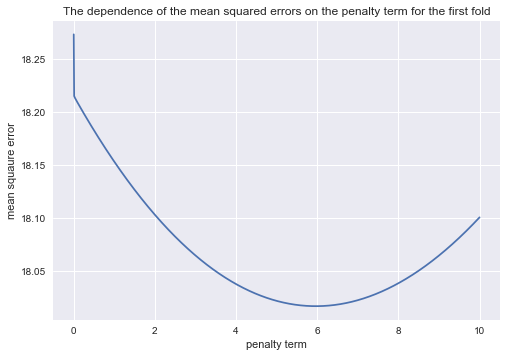

In [14]:
plt.title('The dependence of the mean squared errors on the penalty term for the first fold')
plt.xlabel('penalty term')
plt.ylabel('mean squaure error')
plt.plot(lamb_values, mse_fold1_list)

In [15]:
lamb_1fold_min = lamb_values[np.argmin(mse_fold1_list)]
print(f'The optimal value of the penalty term for the first fold is {lamb_1fold_min}.')

The optimal value of the penalty term for the first fold is 5.9700403.


Now to do the grid search method across all five fold, I calculated the average mean square error across the five folds for each value of the penalty term. Again the optimal penalty term is then determined by finding the value that corresponds to the smallest average MSE in the grid search.

In [16]:
mse_list_RR = []

for lamb in lamb_values:
    mse_t_mean = 0  
    for fold in range(5):
        # predicting y for each fold
        Y_fold_predictions_RR = ridge_regression(X_fold_val[fold], X_fold_train[fold], Y_fold_train[fold],
                                 lamb)
        mse_t = MSE(Y_fold_predictions_RR, Y_fold_val[fold])
        mse_t_mean += mse_t
        
    mse_t_mean = mse_t_mean/5 # This calculates the mean MSE over the five folds for each penalty term.
    mse_list_RR.append(mse_t_mean)

A graph was plotted to visualise how the MSEs depend change with different penalty terms after averaging over the five folds.

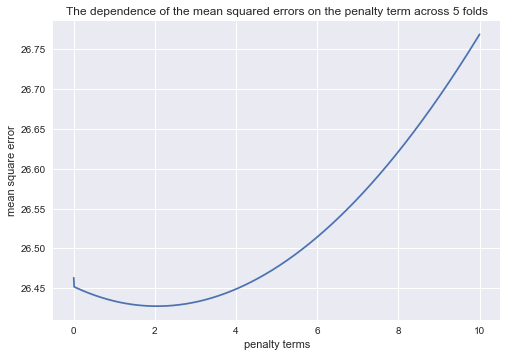

In [17]:
plt.title('The dependence of the mean squared errors on the penalty term across 5 folds')
plt.xlabel('penalty terms')
plt.ylabel('mean square error')
plt.plot(lamb_values, mse_list_RR)

In [18]:
lamb_cv = lamb_values[np.argmin(mse_list_RR)]
print(f'The value of the penalty term obtained from the 5-fold cross-validation is {lamb_cv}.')

The value of the penalty term obtained from the 5-fold cross-validation is 2.0500795000000003.


Both graphs presented clear minima with respect to the penalty terms. This can be interpretted as a bias-viarance tradeoff. At low values of penalty terms, the variance was too high due to little shrinkage to $ \boldsymbol\beta$, while at high values of penalty terms, $ \boldsymbol\beta$ has been shrunk to far causing the bias to be too large.

# 1.2.2

In [19]:
Y_train_predictions_rr, beta_RR = ridge_regression(X_train, X_train, Y_train, lamb_cv, True)
mse_train_rr = MSE(Y_train_predictions_rr, Y_train)
print(f'The in-sample mean squared error is {mse_train_rr}.\n')

Y_test_predictions_rr = ridge_regression(X_test, X_train, Y_train, lamb_cv)
mse_test_rr = MSE(Y_test_predictions_rr, Y_test)
print(f'The out-of-sample mean squared error is {mse_test_rr}.\n')

print(f'The betas for the ridge regression model are :')
print(f' \u03B2 = {np.round(beta_RR,3)}.')

The in-sample mean squared error is 24.568222641114797.

The out-of-sample mean squared error is 19.366684493768346.

The betas for the ridge regression model are :
 β = [22.414 -0.635  0.57  -0.101 -0.101 -0.835  1.585 -0.154 -1.725  1.569
 -0.097 -0.872  0.821 -3.618 -0.835 -0.872  0.57  -1.726].


$ \boldsymbol\beta$ obtained from ridge regression is significantly different from that of linear regression. It is clear large parameters have been shrunk from high order of magnitudes to O(1) or O(0.1) which increases bias but reduces the variance. However, it can be observed that the first parameter has remained nearly unchanged. This is because the first parameter is meant to be the intercept of the model and hence is not affected by the shrinkage.

# 1.3 Regression with k nearest neighbours (kNN)

Unlike linear and ridge regression, kNN is is a an example of a local model instead of a linear model. Given a data point, the predicted value is computed by taking a mean value from the k nearest neighbours. Compared to linear and ridge regression, a local model like kNN is more flexible since it does not assume a parametric form for the model [1].

It is important to determine the optimal k value, which again is a result of bias-variance tradeoff. For example, for small k values, the fit is less smooth than that of large k and that it has a low bias but high variance.

In [20]:
def standardise(X, mu, sigma):
    '''
    Arguments:
    X: numpy array, The data to be standardised
    mu: float, The mean value to be used to standardise X
    sigma: float, The standard deviation to be used to standardise X
    
    Returns:
    The standardised data '''
    return (X-mu)/sigma

In [21]:
def distance(x, y):
    '''
    Arguments:
    x: numpy array, a vector
    y: numpy array, a vector
    
    Returns:
    The Euclidean distance between these two vectors
    '''
    return np.linalg.norm(x-y)

In [22]:
# Standardising both the training and test data using the standard deviation of the training set
mu = np.mean(X_train[:,1:], 0)
sigma = np.std(X_train[:,1:], 0)

X_train_stand = standardise(X_train[:,1:], mu, sigma)
X_test_stand = standardise(X_test[:,1:], mu, sigma)

In [23]:
# Splitting into five folds
X_fold_val, Y_fold_val, X_fold_train, Y_fold_train = T_fold_split(X_train_stand, Y_train)

In [24]:
def k_neighbours(X_test, X_train, Y_train, k=5, return_distance=False):
    '''
    
    Arguments:
    X_test: numpy array, the testing data set.
    X_train: numpy array, the training data set.
    Y_train: numpy array, the output values of the the training data set.
    k: int, number of neighbours.
    return_distance: boolean and is False by default. If this is true, the function returns the distances.
    
    Returns:
    neigh_ind: numpy array, An array the k nearest neighbours
    distance: list, a list of the distances
    '''

    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_text in X_test to all points in X_train 
    point_dist = []
    for x in X_test:
        a = []
        for y in X_train:
            a.append(distance(x, y))
        point_dist.append(a)
    
    # determine which k training points are closest to each test point
    for row in point_dist:
      enum_neigh = enumerate(row)
      sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

      ind_list = [tup[0] for tup in sorted_neigh]
      dist_list = [tup[1] for tup in sorted_neigh]

      dist.append(dist_list)
      neigh_ind.append(ind_list)

    # return distances together with indices of k nearest neighbouts
    if return_distance:
      return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)

In [25]:
def reg_predict(X_test, X_train, Y_train, k=5):
    '''
    Arguments:
    X_test: numpy array, the testing data set.
    X_train: numpy array, the training data set.
    Y_train: numpy array, the output values of the the training data set.
    k: int, the number of neighbours
    
    Returns:
    y_pred: numpy array, the predictions
    '''
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_test, X_train, Y_train, k=k)
    # compute mean over neighbours labels 
    y_pred = np.array([np.mean(Y_train[neighbour]) for neighbour in neighbours]) 

    return y_pred

# 1.3.1

Again I used a grid search method and 5 fold cross-validation to find the k and this process is first demonstrated using the first fold.

A grid of values of the k were created. The MSE corresponding to each of these values was calculated and hence, the optimal k can be determined by finding the value that corresponds to the smallest MSE in the grid search.

# Cross validation of kNN using one fold

In [26]:
k_values = range(1,20)
mse_1fold_lst = []
for k in k_values:
    y_1fold_pred = reg_predict(X_fold_val[2], X_fold_train[2], Y_fold_train[2], k = k)
    
    mse_1fold_lst.append(MSE(y_1fold_pred, Y_fold_val[2]))

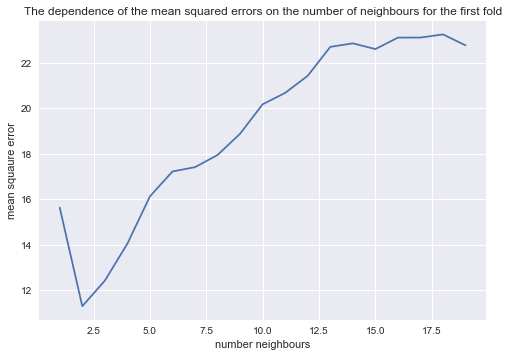

In [27]:
plt.title('The dependence of the mean squared errors on the number of neighbours for the first fold')
plt.xlabel('number neighbours')
plt.ylabel('mean squaure error')
plt.plot(k_values, mse_1fold_lst)

In [28]:
print(f'The k value obtained for one fold is {k_values[np.argmin(mse_1fold_lst)]}.')
print(f'The corresponding MSE is {round(min(mse_1fold_lst), 3)}.')

The k value obtained for one fold is 2.
The corresponding MSE is 11.295.


It can again be seen that there is clear minimum which is at low value of k but when k is too small, the error increases again. This is because small k can lead to overfitting while large k can lead to underfitting. It can also be seen from the graph that at very large k, the MSE levels off. I think this is due to the fact that when too many neighbours are being considered, the locality of the kNN model decreases and the estimation then tends to the mean of the set. However, this depends hugely on the validation and train set, and hence it is important to consider the distubtion from the other folds as follows,

# Distrubtion of error

In [29]:
y_1fold_pred = reg_predict(X_fold_val[2], X_fold_train[2], Y_fold_train[2], k = 2)
error_1fold = Y_fold_val[2] - y_1fold_pred

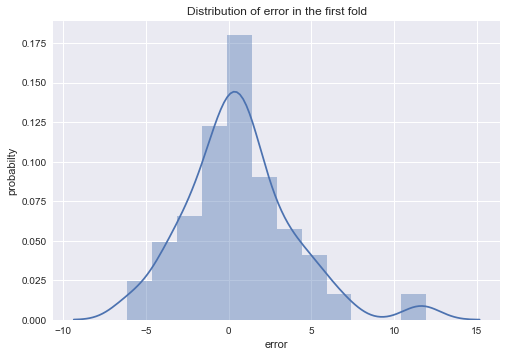

In [30]:
plt.title('Distribution of error in the first fold')
plt.xlabel('error')
plt.ylabel('probabilty')
sns.distplot(error_1fold)


From the graph above, it seems the error from kNN model resembles the shape of a Guassian distribution centred at zero. Moreover, since it is centred at zero, this suggests that the kNN is not over-estimating nor under-estimatting from the predicttions. This also seems to suggest kNN is an appropriate model for this data.

In [31]:
# finding mean mse across folds

mse_list_knn = []
for k in k_values:
    mse_t_mean_knn = 0 #Initialised the mean MSE
    for fold in range(5): # Calculating the MSE from each fold
        y_pred = reg_predict(X_fold_val[fold], X_fold_train[fold], Y_fold_train[fold], k = k)
        mse_knn = MSE(y_pred, Y_fold_val[fold])
        mse_t_mean_knn += mse_knn # Adding this to the average MSE
        
    mse_t_mean = mse_t_mean_knn/5
    mse_list_knn.append(mse_t_mean)

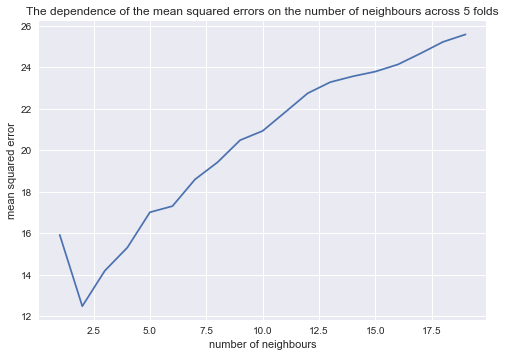

In [32]:
plt.title('The dependence of the mean squared errors on the number of neighbours across 5 folds')
plt.xlabel('number of neighbours')
plt.ylabel('mean squared error')
plt.plot(k_values, mse_list_knn)

In [33]:
optimal_k = k_values[np.argmin(mse_list_knn)]
print(f'The optimal value of k obtained from the 5-fold cross validation is {optimal_k}.')

The optimal value of k obtained from the 5-fold cross validation is 2.


# 1.3.2

In [34]:
y_train_knn = reg_predict(X_train_stand, X_train_stand, Y_train, k = optimal_k)
mse_train_knn = MSE(y_train_knn, Y_train)
print(f'The in-sample mean squared error of the kNN model is {mse_train_knn}.\n')

y_test_knn = reg_predict(X_test_stand, X_train_stand, Y_train, k = optimal_k)
mse_test_knn = MSE(y_test_knn, Y_test)
print(f'The out-of-sample mean squared error of the kNN model is {mse_test_knn}.')

The in-sample mean squared error of the kNN model is 3.970810643564354.

The out-of-sample mean squared error of the kNN model is 13.76362745098039.


A table was created to summarise the performance of the three regression models from above.

In [35]:
summary_mat = np.zeros((3,2))

summary_mat[0,0] = MSE_train_LR
summary_mat[0,1] = MSE_test_LR

summary_mat[1,0] = mse_train_rr
summary_mat[1,1] = mse_test_rr

summary_mat[2,0] = mse_train_knn
summary_mat[2,1] = mse_test_knn

df_summary = pd.DataFrame(summary_mat, columns = ['train accuracy', 'test accuracy'],
                         index = ['linear regression', 'ridge regression', 'k nearest neighbours'])

df_summary

,train accuracy,test accuracy
linear regression,24.369247,19.557376
ridge regression,24.568223,19.366684
k nearest neighbours,3.970811,13.763627


It is clear that the in-sample MSE of the kNN model is significantly smaller its out-of-sample MSE. This is because when the train set is used, the calulation of the prediction includes the data point itself, meaning it includes a data point with perfect accuracy. After taking the mean of the error from the remaining two points, this then results in a small MSE.

It is also clear that the out-of-sample error of kNN is significantly smaller than that of linear regression and ridge regression, which is due to the fact that kNN is a local model and suggests that the descriptors are better modelled non-linearly and that the data is homogenous. Nonetheless, the out-of-sample is lower than that of linear regression and ridge regression, implying this is the best model out of the three. 

# Task 2 Classification

In [36]:
# Importing the classification data set.
df2_train = pd.read_csv('classification_train.csv', header = None)
df2_test = pd.read_csv('classification_test.csv', header = None)
data2 = df2_train.to_numpy()
np.random.seed(18)
np.random.shuffle(data2)

In [37]:
df2_train.head() #To check a brief check on the data, allowing us to know the sort of data we are working with

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.205882,1.0,0.020854,0.5,1.00,1.000000,0.666667,0.333333,0.232143,1.000000,1.0,1.0
1,0.205882,0.5,0.121712,0.0,0.50,0.333333,0.333333,0.666667,0.053571,0.666667,0.0,0.0
2,0.161765,0.5,0.108452,0.5,0.50,0.333333,1.000000,0.666667,0.017857,0.666667,0.0,1.0
3,0.294118,0.5,0.192528,0.0,0.25,0.333333,1.000000,0.666667,0.125000,0.666667,0.0,1.0
4,0.161765,1.0,0.039892,0.0,0.50,0.333333,0.666667,0.333333,0.107143,0.666667,0.0,1.0


In [38]:
# Train set
Y2_train = data2[:,-1]
X2_train = data2[:, :data2.shape[1]-1]

#Testset
Y2_test = df2_test[11].to_numpy().T
X2_test = df2_test.drop(columns = [11]).to_numpy()

In [39]:
# Splittig into five folds
X2_fold_val, Y2_fold_val, X2_fold_train, Y2_fold_train = T_fold_split(X2_train, Y2_train)

# 2.1 Logistic Regression


Logistic regression is a powerful machine learning method that works particularly well with binary classification. So first we assume the probabilty of an input data $\boldsymbol{X}$ can be related to the logistic function as follow,
$$
P(y=1)=\frac{1}{1+e^{-\mathbf{x}^{T} \boldsymbol{\beta}}} = h_{\boldsymbol{\beta}}(\mathbf{x})
$$

By assuming independence in the data, we can obtain the log-likelihood, which we then define to be the cost function:
\begin{equation}
\mathcal{L}=\sum_{i=1}^{N} y^{(i)} \log h_{\boldsymbol{\beta}}\left(\mathbf{x}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\boldsymbol{\beta}}\left(\mathbf{x}^{(i)}\right)\right)
\end{equation}

We then need to optimise this loss function to obtain a best estimate of $ \boldsymbol\beta$, which can be achieved by gradent descent. Then we need find a optimal decision threshold so that we can calculate the probabilty of a given data point using the logistic function and compare it to the decision threshold to classify this data point into binary categories.

In [40]:
def logistic(x):
    '''
    This defines the logistic function.
    '''
    return 1 / (1 + np.exp(-x)) 

In [41]:
def predict_log(X, beta, beta_0):
  y_log = logistic(beta.T @ X + beta_0) 
  return y_log

In [42]:
def initialise(d):
  """    
  Argument:
  d: size of the beta vector (or number of parameters)
  
  Returns:
  beta: initialised vector of shape (d, 1)
  beta_0: initialised scalar (corresponds to the offset)
  """
  
  beta = np.zeros(shape=(d, 1), dtype=np.float32)
  beta_0 = 0
  
  assert(beta.shape==(d, 1))
  assert(isinstance(beta_0, float) or isinstance(beta_0, int))
  
  return beta, beta_0

For gradient descent, we need to first calculate the derivatives of the loss function with respect to $\boldsymbol \beta$ and $\beta_0$ as follows:
$$
\frac{\partial \mathcal L}{\partial \boldsymbol \beta} = \frac{1}{n} \sum_{i=1}^n ( y^{(i)} - \hat{y}_{\text{log}}^{(i)}) X^{(i)}
$$
 
$$
\frac{\partial \mathcal L}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n ( y^{(i)} - \hat{y}_{\text{log}}^{(i)})
$$

These were implemented in the propagate function below, which computes the gradient and cost at some given points. The calculated gradient and cost are then used in the optimise function to optimse the cost function by descending towards to the minimum.

In [43]:
## EDIT THIS FUNCTION
def propagate(X, y, beta, beta_0):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  cost: negative log-likelihood cost for logistic regression
  dbeta: gradient of the loss with respect to beta
  dbeta_0: gradient of the loss with respect to beta_0
  """
  n = X.shape[1]
  y_log = predict_log(X, beta, beta_0)

  # cost function
  cost = (-1) * np.mean(np.multiply(y, np.log(y_log)) + np.multiply(1-y, np.log(1 - y_log)), axis=1)

  # derivatives
  dbeta = (1/n) * X @ np.transpose(y_log - y)  
  dbeta_0 =  np.mean((y_log - y)) 

  assert(dbeta.shape==beta.shape)
  assert(dbeta_0.dtype==float)
  cost = np.squeeze(cost)
  assert(cost.shape==())
  
  # store gradients in a dictionary
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return grads, cost

In [44]:
## EDIT THIS FUNCTION
def optimise(X, y, beta, beta_0, num_iterations=1000, learning_rate=0.005, print_cost=False):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar
  num_iterations: number of iterations gradient descent shall update the parameters
  learning_rate: step size in updating procedure
  print_cost: whether to print the cost every 100 iterations or not

  Returns:
  params: dictionary containing the parameters beta and offset beta_0
  grads: dictionary containing the gradients
  costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
  """
  costs = []
    
  for i in range(num_iterations):

      # calculate cost and gradients
      grads, cost = propagate(X, y, beta, beta_0)  
      
      # retrieve derivatives from grads
      dbeta = grads["dbeta"]
      dbeta_0 = grads["dbeta_0"]
      
      # updating procedure
      beta = beta - learning_rate * dbeta  
      beta_0 = beta_0 - learning_rate * dbeta_0  
      
      # record the costs
      if i % 100 == 0:
          costs.append(cost)
      
      # print the cost every 100 iterations
      if print_cost and i % 100 == 0:
          print ("cost after iteration %i: %f" %(i, cost))
  
  # save parameters and gradients in dictionary
  params = {"beta": beta, "beta_0": beta_0}
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return params, grads, costs


The predict function below uses $\boldsymbol \beta$ and $\beta_0$ obtained from the optimisation to predict a given data set.

In [45]:
## EDIT THIS FUNCTION
def predict(X_test, beta, beta_0, threshold = 0.5):
  """
  Arguments:
  X_test: test data of size (d, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  y_pred: vector containing all binary predictions (0/1) for the examples in X_test
  """
  n = X_test.shape[1]
  y_pred = np.zeros((1,n))
  beta = beta.reshape(X_test.shape[0], 1)
  
  # compute vector y_log predicting the probabilities
  y_log = predict_log(X_test, beta, beta_0)
  
  for i in range(y_log.shape[1]):
      
      # convert probabilities y_log to actual predictions y_pred
      if y_log[0, i] > threshold:
          y_pred[0, i] = 1  
      else:
          y_pred[0, i] = 0  
  
  assert(y_pred.shape==(1, n))
  
  return y_pred

A pythonic way to define an algorithm is placing all functions in one model that has all hyperparameters as arguments. This allows you to quickly evaluate different hyperparameters and optimise over these. So, let's do this:

In [46]:
def model(X_train, y_train, X_test, y_test, threshold, num_iterations=2000, learning_rate=0.5, print_cost=False):
  '''
  Arguments:
  X_train: numpy array, the training data
  y_train: numpy array, the true result of the training data
  X_test: numpy array, the test data
  y_train: numpy array, the true result of the test data
  threshold: float, the decision threshold
  num_iterations: int, the number of iterations for the gradient descent
  learning_rate: float, the learning rate of the gradient descent
  print cost: boolean and False by default, if this is is true, it prints the cost every 100 iterations 
  Returns:
  d: dict, a dictionary containg the information of the model, including the cost, preictions of test and train data,
     fitting parameters, learning rate and the number of iterations
  test_accuracy: float, The accuracy of prediction
  
  '''  
    
    
  # initialize parameters with zeros
  beta, beta_0 = initialise(X_train.shape[0])

  # gradient descent
  parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost=print_cost)

  # retrieve parameters beta and beta_0 from dictionary "parameters"
  beta = parameters["beta"]
  beta_0 = parameters["beta_0"]

  # predict test and train set examples
  y_pred_test = predict(X_test, beta, beta_0, threshold)
  y_pred_train = predict(X_train, beta, threshold)


  test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100
    
  # saving all information
  d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations}
  
  return d, test_accuracy

In [47]:
test_acc_list_2d = []

# Define the grid of values to scan through.
alpha_values = [0.0001, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 1]
threshold_values = np.arange(0.3, 0.8, 0.05)

for alpha in alpha_values: # Scanning for each alpha value
    test_acc_list = []
    
    for threshold in threshold_values:  # scanning for each decision threshold
        test_acc = 0
        for fold in range(5): # scanning each fold
            test_accuracy = model(X2_fold_train[fold].T, Y2_fold_train[fold], X2_fold_val[fold].T, Y2_fold_val[fold], 
                           threshold = threshold, num_iterations=5000, learning_rate = alpha, print_cost=False)[1]
            test_acc += test_accuracy
        # adding this to the mean accuracy of across all folds for specific alphas and thresholds  
        test_acc = test_acc/5 
        test_acc_list.append(test_acc)
    test_acc_list_2d.append(test_acc_list)

In [48]:
test_acc_list_2d = np.array(test_acc_list_2d) # converting it into numpy array

A heatmap was created to visualise how the accuracies vary with different alpha and thresholds.

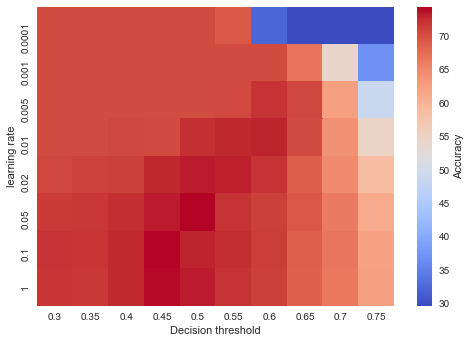

In [49]:
heatmap = sns.heatmap(np.array(test_acc_list_2d), cmap = 'coolwarm', annot = False,
           yticklabels = alpha_values, xticklabels=np.round(threshold_values,3),
           cbar_kws={'label': 'Accuracy'})
plt.xlabel('Decision threshold')
plt.ylabel('learning rate')
plt.show()

The optimal learning rate and decision threshold were then determined:

In [50]:
index = np.where(test_acc_list_2d == np.max(test_acc_list_2d)) # locate where the maximum accuracy is in the matrix

optimal_acc = float(test_acc_list_2d[index[0][0], index[1][0]])
print(f'The optimal accuaracy is {optimal_acc}%.\n')

optimal_alpha = alpha_values[int(index[0][0])]
print(f'The optimal learning rate is {optimal_alpha}.\n')

optimal_threshold = threshold_values[int(index[1][0])]
print(f'The optimal decision threshold is {round(optimal_threshold,3)}.')

The optimal accuaracy is 74.375%.

The optimal learning rate is 0.1.

The optimal decision threshold is 0.45.


# 1.3.2


In [51]:
#Calculating the in-sample accuracy
acc_train_logistic = model(X2_train.T, Y2_train, X2_train.T, Y2_train, threshold = optimal_threshold, 
                           num_iterations=5000, learning_rate = optimal_alpha, print_cost=False)[1]
print(f'The in-sample accuracy is {acc_train_logistic}%.\n')

#Calculating the out-of-sample accuracy
acc_test_logistic = model(X2_test.T, Y2_test, X2_train.T, Y2_train, threshold = optimal_threshold, 
                          num_iterations=5000, learning_rate = optimal_alpha, print_cost=False)[1]
print(f'The out-of-sample accuracy is {acc_test_logistic}%.\n')

The in-sample accuracy is 74.625%.

The out-of-sample accuracy is 73.375%.



The in-sample and out-of-sample accuracies are very close, which suggests the regression was not overfitted. Moreover, an accuracy of ~74% is acceptable and could have practical uses. Although the logistic regression seems to have produced a good accuracy, however it is important to consider other models as well. One key disadvantages of logistic regression is that it becomes unstable when the data can be well separated [1].

# 2.2 Random Forest


Random forest is a popular classification machine learning technique. It starts with a decision tree, which is trained by splitting the input data into categories. When a new data point is passed into the algorithm, this data point undergoes the splitting, depending on its properties. Finally this data point would reach a region, from which a majority vote was used to label this new data point.

A random forest is an ensemble of trees, which is built by first bootstrapping, which involves generating random samples with replace from a given training data. Then at each split for each tree, we randomly choose a different random subset of predictors, which can prevent certain descriptors from dominating the first seveeral splits, decreasing the correlations between trees and avoiding overfitting. Although it is believed that a high number of trees can improve the accuracy, this reduces the efficiency of the algorithm and increases the computation time, and therefore an optimal number of trees need to be chosen to balance the computation time and the accuracy for an opitmal model. Furthermore, the maximum depth of each tree can make a difference, since a very deep can overfit the data, while a small depth can underfit it.

Hence, there are three hyperparameters to be determined: the number of trees in the forest, the maximum number of predictors to be chosen at each split and the depth of the tree. The hyperparameter optimisation was again carried out by 5-fold cross validation.

In [52]:
# Train set
Y2_train = data2[:,-1]
X2_train = data2[:, :data2.shape[1]-1]

#Testset
Y2_test = df2_test[11].to_numpy().T
X2_test = df2_test.drop(columns = [11]).to_numpy()

In [53]:
df_X2_train = pd.DataFrame(X2_train)
df_Y2_train = pd.Series(Y2_train)
columns = range(X2_train.shape[1])
df_X2_train.columns = columns

df_X2_test = pd.DataFrame(X2_test)
df_Y2_test = pd.Series(Y2_test)
columns = range(X2_test.shape[1])
df_X2_test.columns = columns

In a decision tree, the first split is chosen to be the one from which most information can be gained and this can be measured through cross entropy (defined in Introduction to Statistical Learning):
$$
\text{GI}(\boldsymbol y) = \sum_{i=1}^N  P (y_i) log(P (y_i))
$$

Therefore, in the decision tree, the cross entropy of different possible splits were calucalated, from which the split with the lowest cross entropy is chosen to be the next split.

# Building a tree/forest

First,`gini_purification` can calculate the cross entropy given an array of labels.

In [54]:
# EDIT THIS FUNCTION
def cross_entropy(y, sample_weights=None):
  """ 
  Calculate the cross entropy for labels.
  Arguments:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (float): the cross entropy for y.
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
  ce = 0
  num = y.shape[0]  # number of labels
  label_counts = {}  # caculate different labels in y，and store in label_counts
  for i in range(num):
      if y[i] not in label_counts.keys():
          label_counts[y[i]] = 0
      label_counts[y[i]] += sample_weights[i]
  
  for key in label_counts:
      prob = float(label_counts[key]) / float(np.sum(sample_weights))
      ce -= prob * np.log(prob) ## <-- SOLUTION

  return ce

Now the `split_dataset` function can split the data into two subsets, using an inequality as the condition to split.

In [55]:
def split_dataset(X, y, column, value, sample_weights=None):
  """
  Return the split of data whose column-th feature equals value.
  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      column: the column of the feature for splitting.
      value: the value of the column-th feature for splitting.
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (np.array): the subset of X whose column-th feature equals value.
      (np.array): the subset of y whose column-th feature equals value.
      (np.array): the subset of sample weights whose column-th feature equals value.
  """ 
  ret = []
  ret2 = []
  featVec = X[:, column]
  
  for i in range(len(featVec)):
      if featVec[i]<=value:
          ret.append(i)
      else:
          ret2.append(i)
          
  
  sub_X = X[ret,:]
  sub_y = y[ret]
  sub_sample_weights = sample_weights[ret]
    
  sub2_X = X[ret2, :]
  sub2_y = y[ret2]
  sub2_sample_weights = sample_weights[ret2]

  return sub_X, sub_y, sub_sample_weights, sub2_X, sub2_y, sub2_sample_weights

The `ce_purification` function below calculates the information gained in cross entropy from a given split.

In [56]:
# EDIT THIS FUNCTION

def ce_purification(X, y, column, value, sample_weights=None):
  """
  Calculate the resulted gini impurity given a vector of features.
  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (float): the resulted gini impurity after splitting by this feature.
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
  new_impurity = 0
  old_cost = cross_entropy(y, sample_weights)
  
  unique_vals = np.unique(X[:, column])
  
  #splits the data
  sub_X, sub_y, sub_sample_weights, sub2_X, sub2_y, sub2_sample_weights = split_dataset(X, y, column, value, sample_weights) ## <-- SOLUTION
  
  # calculate the weights for each of the two subsets from the split
  prob = np.sum(sub_sample_weights) / float(np.sum(sample_weights))
  prob2 = np.sum(sub2_sample_weights) / float(np.sum(sample_weights))
    
  # calculate the the new weighted cross entropy
  new_cost = prob * cross_entropy(sub_y, sub_sample_weights) + prob2 * cross_entropy(sub2_y, sub2_sample_weights)

  
  new_impurity = old_cost - new_cost # information gain

  return new_impurity

The `choose_best_feature` function calculates the information gained from each possible split then returns the split that maximises the information gained.

In [57]:
## EDIT THIS FUNCTION
def choose_best_feature(X, y, sample_weights=None):
  """
  Choose the best feature to split according to criterion.
  Args:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the column for the best feature
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]

  best_feature_idx = 0
  best_value= 0.3
  n_features = X.shape[1]    

  
  best_gain_cost = 0.0
 
    
  # choosing best feature and best value
  for i in range(n_features):
    unique_vals = np.unique(X[:, i])[1: len(X[:, i]) - 1]
    
    for value in unique_vals:
      info_gain_cost = ce_purification(X, y, i, value, sample_weights)
               
      if info_gain_cost > best_gain_cost:
          best_gain_cost = info_gain_cost
          best_feature_idx = i                
          best_value = value
  
  return best_feature_idx, best_value

The `majority vote` function determines the majority label of a given array. This 

In [58]:
def majority_vote(y, sample_weights=None):
  """
  Return the label which appears the most in y.
  Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the majority label
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
  majority_label = y[0]

  dict_num = {}
  # a dictionary of the labels and the population of each label
  for i in range(y.shape[0]):
      if y[i] not in dict_num.keys():
          dict_num[y[i]] = sample_weights[i]
      else:
          dict_num[y[i]] += sample_weights[i]
  
  majority_label = max(dict_num, key=dict_num.get)
  
  return majority_label

The `build_tree` and `train` functions build a tree by choosing the best feature and value.

In [59]:
# EDIT THIS FUNCTION
def build_tree(X, y, feature_names, depth, sample_weights=None, max_depth=7, min_samples_leaf=2, max_num_des = 7, seed = 1):
  """Build the decision tree according to the data.
  Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (dict): a dict denoting the decision tree. 
  """
  mytree = dict()

  # include a clause for the cases where (i) no feature, (ii) all lables are the same, (iii) depth exceed, or (iv) X is too small
  if len(X) == 0:
      return 1
  elif len(feature_names)==0 or len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf: 
      return majority_vote(y, sample_weights)
  
  
  else:
    random.seed(seed)
    # this generates the descriptors to choose from at each split
    columns = list(random.sample(range(X.shape[1]), max_num_des))
    columns.sort()
    
    X_reduced = X[:,columns]
    
    best_feature_idx, best_value = choose_best_feature(X_reduced, y, sample_weights)  ## <-- SOLUTION
    
    best_feature_name = feature_names[best_feature_idx]
    feature_names = feature_names[:]
    

    mytree = {best_feature_name:{}}
    unique_vals = np.unique(X[:, best_feature_idx])

    #adding the subgroups into the dictionary.
    sub_X, sub_y, sub_sample_weights, sub2_X, sub2_y, sub2_sample_weights = split_dataset(X, y, best_feature_idx, 
                                                                                          best_value, sample_weights)  ## <-- SOLUTION
    mytree[best_feature_name][best_value] = build_tree(sub_X, sub_y, feature_names, depth+1, 
                                                       sub_sample_weights, max_depth = max_depth, max_num_des = max_num_des,seed = seed +1)  ## <-- SOLUTION (hint: use depth+1 as the depth)
    mytree[best_feature_name]['no'] = build_tree(sub2_X, sub2_y, feature_names, depth+1, 
                                                 sub2_sample_weights, max_depth = max_depth, max_num_des = max_num_des, seed = seed +1)


    return mytree

In [60]:
def train(X, y, sample_weights=None, max_depth =7, max_num_des = 11):
  """
  Build the decision tree according to the training data.
  Args:
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      sample_weights: weights for each samples, of shape (N,).
  """
  if sample_weights is None:
      # if the sample weights is not provided, we assume the samples have uniform weights
      sample_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
      sample_weights = np.array(sample_weights) / np.sum(sample_weights)

  feature_names = X.columns.tolist()
  
  X = np.array(X)
  y = np.array(y)
  tree = build_tree(X, y, feature_names, depth=1, sample_weights=sample_weights, max_depth = max_depth, max_num_des = max_num_des)
  return tree

After training a decision tree, the `classify` and `predict` functions are used to make prediction from a given data point

In [61]:
def classify(tree, x):
  """
  Classify a single sample with the fitted decision tree.
  Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
  Returns:
      (int): predicted testing sample label.
  """
  
  feature_name = list(tree.keys())[0] # first element
  second_dict = tree[feature_name]            
  key = x.loc[feature_name]

  # This brings the data point to the right region of the tree by following the splits.
  if key <= list(second_dict.keys())[0]:
    key = list(second_dict.keys())[0]
  else:
    key = 'no'
      
  value_of_key = second_dict[key]
  if isinstance(value_of_key, dict):
      label = classify(value_of_key, x)
  else:
      label=value_of_key
  return label

In [62]:
def predict(X):
  """
  Predict classification results for X.
  Args:
      X: (pd.Dataframe) testing sample features, of shape (N, D).
  Returns:
      (np.array): predicted testing sample labels, of shape (N,).
  """
  if len(X.shape)==1:
      return classify(tree, X)
  else:
      results=[]
      for i in range(X.shape[0]):
          results.append(classify(tree, X.iloc[i, :]))
      return np.array(results)

Now we need to build a forest from the trees

In [63]:
def random_forest(X_test, X_train, Y_train, num_trees = 10, depth_of_tree = 10, max_num_des =10):
    '''
    Arguments:
    X_test: numpy array, the test data
    X_train: numpy array, the training data
    Y_train: numpy array, the test labels
    num_trees: int, number of trees
    depth_of_tree: int, depth of the trees
    max_num_des: int, maximum number of descriptors to choose from at each split
    
    Returns:
    results: numpy array, the predictions fom the test data.
    '''
    
    np.random.seed(18)
    #bagging
    # generate a matrix with random numbers where each row has the same length as the number of training data point.
    # each row represents the index of the training data used.
    rand_matrix = np.random.randint(0,len(X_train), (num_trees, len(X_train)))
    bag_X2_train_arr = np.array([[X_train[i] for i in row]  for row in rand_matrix])
    bag_Y2_train_arr = np.array([[Y_train[i] for i in row]  for row in rand_matrix])
    
    vote_matrix = [] 
    for i in range(num_trees):
        df_bag_X2_train_arr = pd.DataFrame(bag_X2_train_arr[i])
        df_bag_Y2_train_arr = pd.Series(bag_Y2_train_arr[i])
        df_X_test = pd.DataFrame(X_test)
        tree = train(df_bag_X2_train_arr, df_bag_Y2_train_arr, max_depth = depth_of_tree, max_num_des = max_num_des)
        vote_matrix.append(predict(df_X_test))
    # the vote matrix now contains the predicted labels from each tree
    vote_matrix = np.array(vote_matrix)  
    # This gives the average votes per tree from the forest.
    average_votes = sum(vote_matrix)/len(bag_X2_train_arr)
    results = np.array([1.0 if vote >= 0.5 else 0.0 for vote in average_votes])
    return results

In [64]:
def accuracy(result, true_Y):
    '''
    Arguments:
    result: numpy array, the predictions from a data set.
    true_y: numpy array, the true label of the data set
    
    Returns:
    accuracy: numpy array, the accuracy calculated from the predictions and the true labels.
    '''
    accuracy = 0 
    for i in range(len(true_Y)):
        if true_Y[i] == result[i]:
            accuracy += 1/len(true_Y)
    return accuracy

Now we need to optimise the hyperparameter by 5-fold cross validation. However, since building a random forest is computationally expensive, the depth of tree and maximum number of descriptors were cross-validated using only one tree.

Please note the cross validations below will take some time to run.

In [65]:
# splitting the training data into 5 folds.
X_fold_val_rf, Y_fold_val_rf, X_fold_train_rf, Y_fold_train_rf = list(T_fold_split(X2_train, Y2_train))

In [66]:
depth_list = range(2,10)
acc_depth_list = []
for i in depth_list:
    acc_mean_fold = 0
    for fold in range(5):
        df_X_fold_val_rf = pd.DataFrame(X_fold_val_rf[fold])
        df_Y_fold_val_rf = pd.Series(Y_fold_val_rf[fold])
        df_X_fold_train_rf = pd.DataFrame(X_fold_train_rf[fold])
        df_Y_fold_train_rf = pd.Series(Y_fold_train_rf[fold])
        
        tree = train(df_X_fold_train_rf, df_Y_fold_train_rf, max_depth = i)
        acc_depth_fold = accuracy(predict(df_X_fold_val_rf), df_Y_fold_val_rf)
        
        acc_mean_fold += acc_depth_fold/5
    
    acc_depth_list.append(acc_mean_fold)

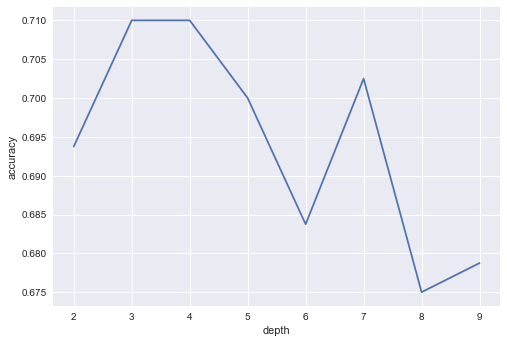

In [67]:
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.plot(depth_list, acc_depth_list)

In [68]:
des_list = range(2,10)
acc_des_list = []
for i in des_list:
    acc_mean_fold_des = 0
    for fold in range(5):
        df_X_fold_val_rf = pd.DataFrame(X_fold_val_rf[fold])
        df_Y_fold_val_rf = pd.Series(Y_fold_val_rf[fold])
        df_X_fold_train_rf = pd.DataFrame(X_fold_train_rf[fold])
        df_Y_fold_train_rf = pd.Series(Y_fold_train_rf[fold])
        
        tree = train(df_X_fold_train_rf, df_Y_fold_train_rf, max_depth = 5, max_num_des = i)
        #print(tree)
        acc_depth_fold = accuracy(predict(df_X_fold_val_rf), df_Y_fold_val_rf)
        
        acc_mean_fold_des += acc_depth_fold/5
    
    acc_des_list.append(acc_mean_fold_des)

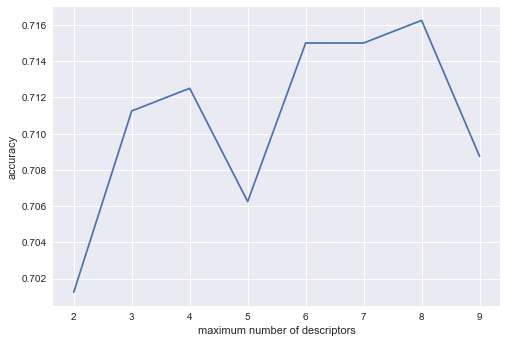

In [69]:
plt.xlabel('maximum number of descriptors')
plt.ylabel('accuracy')
plt.plot(des_list, acc_des_list)

In [71]:
numbers = range(3,16)
acc_lst_num_trees = []
for num in numbers:
    #print(num)
    mean_acc = 0
    for fold in range(5):
        results = random_forest(X_fold_val_rf[fold], X_fold_train_rf[fold], Y_fold_train_rf[fold], 
                                num_trees = num, depth_of_tree =10 , max_num_des =7)
        acc = accuracy(results, Y_fold_val_rf[fold])
        #print(acc)
        mean_acc +=acc/5
        
    acc_lst_num_trees.append(mean_acc)

numbers = np.array(numbers)

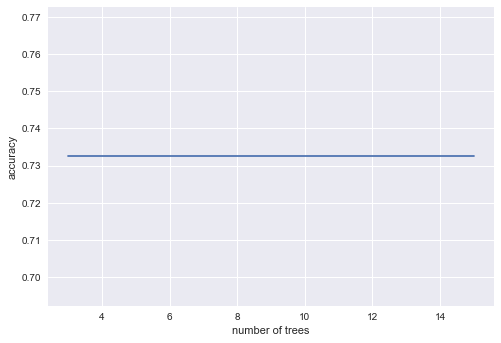

In [72]:
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.plot(numbers,acc_lst_num_trees)

From the above graphs, the optimal depth and number of trees were determined to be 4 and 4 respectively from the 5-fold cross-validation. This result is considered to be reasonable. For instance, for number of descriptors, it was expected to be around 3 and 4 since the usual optimal number of descriptors is around $\sqrt{p}$, where p is the total number of predictors (12 in this case). However, unexpectedly the number of trees do not affect the accuracy and this is believed to be a code error in the cross validation which unfortunately was not found. For the later analyses, the optimal number of trees was assumed to be 10. 

Therefore in conclusion: <br>
optimal number of decision trees = 10<br>
optimal depth of trees = 4 <br>
optimal maximum number of descriptos chosen at each split = 7

However, Please note that since random choices of descriptors are chosenat each split therefore reproduced results may be different.

# 2.2.2

Now having obtained this optimal model, we can check the performance of this model with the train and test data. Here the confusion matrix is used instead of accuracy.

In [73]:
def confusion_matrix(pred, true_y):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    n = len(pred)
    #print(n)
    for i in range(n):
        #print(i)
        if pred[i] == 1.0 and true_y[i] == 1.0:
            #print(i)
            tp += 1
        elif pred[i] == 0.0 and true_y[i] == 0.0:
            tn += 1
        elif pred[i] == 1.0 and true_y[i] == 0.0:
            fp += 1
        elif pred[i] == 0.0 and true_y[i] == 1.0:
            fn += 1
    con_mat = np.array([[tp, fp],
                        [fn, tn]])
    df_con_mat = pd.DataFrame(con_mat, columns = ['true 1', 'true 0'],
                         index = ['predicted 1', 'predicted 0'])
    return df_con_mat

In [98]:
y_pred_train_rf = random_forest(X2_train, X2_train, Y2_train, num_trees = 10, depth_of_tree = 4, max_num_des =7)

df_con_mat_train = confusion_matrix(y_pred_train_rf, Y2_train)
df_con_mat_train.style.set_caption("Training data")

,true 1,true 0
predicted 1,545,0
predicted 0,18,0


In [99]:
y_pred_test_rf = random_forest(X2_test, X2_train, Y2_train, num_trees = 10, depth_of_tree = 4, max_num_des =7)

df_con_mat_test = confusion_matrix(y_pred_test_rf, Y2_test)
df_con_mat_test.style.set_caption("Test data")

,true 1,true 0
predicted 1,133,0
predicted 0,4,0


However, as seen from the confusion matrix, the model is predicting mainly postive (1). This in fact suggests although it has a good precision (a high true positive rate), and that the model still needs adjustment and further improvement. This is thought that since the majority of the training data is positive, the tree might have overfitted this data. However, this may also exist an error in the code.

# 2.3 Support Vector Machine

Support vector machine is another powerful classification algorithm. It works by finding a optimal hyperplane such that on one side of the plane contains a majority of one label (defined to be 1) and the the other side contains a majority of the other label (defined to be -1). In the limited time, only the hard margine support vector machine was implemented.

For linear hard margin SVM, the optimal hyperplane is one such that the margin is maximised while satisfying the constraint such that the two categories are on the right sides of the hyperplane, which can be expressed as an optimisation problem below:

\begin{equation}
\min _{\mathbf{w}} \frac{1}{2}\|\mathbf{w}\|^{2} \quad 
\end{equation}
\begin{equation}
\text { subject to } \quad y^{(i)}\left(\mathbf{x}^{(i)} \cdot \mathbf{w}+b\right) \geq 1, \quad i=1, \ldots, N
\end{equation}



In [76]:
#This maps the label 0 to 1
Y2_train_SVM = Y2_train
Y2_train_SVM[Y2_train_SVM == 0] = -1

Y2_test_SVM = Y2_test
Y2_test_SVM[Y2_test_SVM == 0] = -1

In [77]:
# Standardising the data
mu2 = np.mean(X2_train, 0)
std2 = np.std(X2_train, 0)

X2_train_std = standardise(X2_train, mu2, std2)
X2_test_std = standardise(X2_test, mu2, std2)

In [78]:
# This adds a column of ones to be its first column.
X2_train_SVM = np.concatenate((np.ones((len(X2_train_std), 1)), X2_train_std), axis =1)
X2_test_SVM = np.concatenate((np.ones((len(X2_test_std), 1)), X2_test_std), axis =1)

In [79]:
# This defines the radial basis function kernel.
def RBF(x, y, sigma =1 ):
    mod = distance(x,y)
    return np.exp(-(mod**2)/sigma)

## Linear SVM
The optimsation problem stated above can be solved using quadratic programming but this requires significant computational power. However, this can be solved using the loss function of the soft margin SVM:
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol w \cdot x_i + b) \bigg) \, .
$$
where $\boldsymbol w$ is the vector of weights, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our X as an additional column of $1$'s.

The regularisation parameter can be used to adjust the 'hardness' of the margin. To adapt this to be a hard margin SVM, we can then optimise this loss function by having the regularisation parameter being set a very large value, eg. $10^{6}$.

Stochastic gradient descent is used to minise the loss function and hence the followig two functions were implemented to calculate the cost and its gradient.

In [80]:
def compute_cost(W, X, y, regul_strength=10):
  '''
  Arguments:
  W: numpy array, vector fo weights
  X: numpy array, the training data
  y: numpy array, label of the training data (-1 or 1)
  regul_strength: float: the regularisation strength which is set to 10 by default.
  
  Returns:
  cost: float, the cost
  '''
    
  n = X.shape[0]
  distances = 1 - y * (np.dot(X, W))  
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * (np.sum(distances) / n)  

  # calculate cost
  
  cost = 1 / 2 * np.dot(W, W) + hinge
  return cost

In [81]:
# calculate gradient of cost
def calculate_cost_gradient(W, X_batch, y_batch, regul_strength=1e5):
  '''
  Arguments:
  W: numpy array, vector fo weights
  X_batch: numpy array, a data point
  y_batch: int, label of the training data (-1 or 1)
  regul_strength: float: the regularisation strength which is set to 10 by default.
  
  Returns:
  dw: float, the gradient of the cost function
  
  
  
  '''
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - (y_batch * np.dot(X_batch, W))
  dw = np.zeros(len(W))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = W
      else:
          di = W - (regul_strength * y_batch[ind] * X_batch[ind])
      dw += di

  dw = dw/len(y_batch)  # average
  return dw

Now, stochastic gradient is implemented for the optimisation using the compute_cost and calculate_cost_gradient functions.

In [82]:
# EDIT THIS FUNCTION
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    
  '''
  Arguments:
  X: numpy array, the training data
  y: numpy array, the label of the training data (-1 or 1)
  stop_criterion: float, determines when to stop the stochastic gradient descent which is set to be 0.01 by default
  learning_rate: float, the learning rate of the stochastic gradient descent which is set to be 1e-5 by default
  regul_strength: float, the regularisation strength of the cost function. Set to be 1e-5 by default
  print_cost: boolean. This deterines whether print the cost. Set to be False by default.
  
  Returns:
  weights: numpy array, the weights after optimising by the stochastic gradient descent.

  '''
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle([X, y])
      for ind, x in enumerate(X):
          ascent = calculate_cost_gradient(weights, x, y[ind], regul_strength) 
          weights = weights - (learning_rate * ascent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
          # compute cost
          cost = compute_cost(weights, X, y, regul_strength) 
          if print_outcome:
            
            print("Iteration is: {}, Cost is: {}".format(iteration, cost))
          # stop criterion
          if abs(prev_cost - cost) < stop_criterion * prev_cost:
              return weights
          
          prev_cost = cost
          nth += 1
  
  return weights

# 2.3.1 
# Linear hard margin SVM
First we trained the model where I have set the regularisation to be $ 10^{6}$, which increases the hardness of the margin.

In [83]:
# train the model
W = sgd(X2_train_SVM, Y2_train_SVM, max_iterations=5000, stop_criterion=0.01, learning_rate=1e-5, 
        regul_strength=1e6, print_outcome=False)


Defined a score function to determine the accuracy of the model. To make prediction using the model, we use:
\begin{equation}
\left\{\begin{array}{ll}
x^{\text {in }} \cdot \mathbf{w}+b \geq 0 & \text { then } \hat{y}=+1 \\
\mathbf{x}^{\text {in }} \cdot \mathbf{w}+b<0 & \text { then } \hat{y}=-1
\end{array}\right.
\end{equation}


In [84]:
## EDIT THIS FUNCTION
def score(W, X, y, return_y_pred = False):
  '''
  Arguments:
  W: numpy array, vector fo weights
  X: numpy array, the training data
  y: numpy array, label of the training data (-1 or 1)
  return_y_pred: boolean, this determines whethere to return the predictions.
  
  Returns:
  accuracy: float, the accuracy of the model given a test data.
  y_preds: numpy array, the predictions
  '''
  y_preds = np.array([])
  for i in range(X.shape[0]):
    y_pred = np.sign(np.dot(X[i], W))
    y_preds = np.append(y_preds, y_pred)
  #print(y_preds)
  if return_y_pred: # comparing with the known predictions
      return np.float(sum(y_preds==y)) / float(len(y)), y_preds
  else:
      return np.float(sum(y_preds==y)) / float(len(y))

Now we can evaluate of the performance of the hard margin linear SVM.

In [85]:
print("Accuracy on train set: {}".format(score(W, X2_train_SVM, Y2_train_SVM)))
print("Accuracy on test set: {}".format(score(W, X2_test_SVM, Y2_test_SVM)))

Accuracy on train set: 0.60375
Accuracy on test set: 0.62


The hard margin linear SVM has an acceptbale accuracy for both the train and test set. However, an imperfect training accuracy also suggests the data cannot be perfectly separated into categories, since this is a hard margin linear SVM.

# Hard margin kernel SVM
Now to improve on the linear SVM, A kernel SVM was implemented. This works by introducing a higher dimensionality, by a kernel function which can be interpretted as transforming a dot product to a higher-dimensional space.
The Gaussian radial basis function was used as the kernel function:

\begin{equation}
k(\mathbf{x}, \mathbf{y})=e^{\frac{-\|\mathbf{x}-\mathbf{y}\|^{2}}{\sigma}}
\end{equation}

This kernel canbe interpretted as to have a 'local behaviour' [1] since data points that are far from the the suppor vectors have exponentially less cotribution than the closer points

Now define the radial basis function.

In [86]:
def RBF(x, y, sigma =100):
    mod = np.linalg.norm(x-y)
    return np.exp(-(mod**2)/sigma)

The following functions are similar to the previous ones for the linear hard margin SVM but the dot product has been replaced by a the kernel function. Moreover, instead of including the interception b in the matrix, it is taken out since kernel function is no longer a dot product. The intercept is chosen to be a negative small number because the kernel is always positive and it would require a negative intercept to make reasonable predictions. Moreover, I think using an arbitrary intercept, the value of sigma can be adjusted to give reasonable predictions


In [87]:
def compute_cost_rbf(W, X, y, regul_strength=10, sigma =100, b= -.5):
  '''
  Arguments:
  W: numpy array, vector fo weights
  X: numpy array, the training data
  y: numpy array, label of the training data (-1 or 1)
  regul_strength: float: the regularisation strength which is set to 10 by default.
  
  Returns:
  cost: float, the cost
  '''
  n = X.shape[0]
  distances = 1 - y * (RBF(X, W, sigma) + b)  
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * (np.sum(distances) / n)  

  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge # the dot product was left here since kernel function would just give one
  return cost

Next, we need the gradients of this cost function.

In [88]:
# calculate gradient of cost
# calculate gradient of cost
def calculate_cost_gradient_rbf(W, X_batch, y_batch, regul_strength=1e5, sigma =100, b= -0.5):
    
  '''
  Arguments:
  W: numpy array, vector fo weights
  X_batch: numpy array, a data point
  y_batch: int, label of the training data (-1 or 1)
  regul_strength: float: the regularisation strength which is set to 10 by default.
  
  Returns:
  dw: float, the gradient of the cost function
  
  '''
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - y_batch * (RBF(X_batch, W, sigma) +b)
  dw = np.zeros(len(W))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = W
      else:
          di = W - (regul_strength * y_batch[ind] * X_batch[ind])
      dw += di

  dw = dw/len(y_batch)  # average
  return dw

In [89]:
# EDIT THIS FUNCTION
def sgd_rbf(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, 
            regul_strength=1e5, print_outcome=False, sigma = 100, b= -.5):
    
  '''
  Arguments:
  X: numpy array, the training data
  y: numpy array, the label of the training data (-1 or 1)
  stop_criterion: float, determines when to stop the stochastic gradient descent which is set to be 0.01 by default
  learning_rate: float, the learning rate of the stochastic gradient descent which is set to be 1e-5 by default
  regul_strength: float, the regularisation strength of the cost function. Set to be 1e-5 by default
  print_cost: boolean. This deterines whether print the cost. Set to be False by default.
  
  Returns:
  weights: numpy array, the weights after optimising by the stochastic gradient descent.
  '''
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle([X, y])
      for ind, x in enumerate(X):
          ascent = calculate_cost_gradient_rbf(weights, x, y[ind], regul_strength, sigma = sigma)
          weights = weights - (learning_rate * ascent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
          # compute cost
          cost = compute_cost_rbf(weights, X, y, regul_strength, sigma = sigma)  
          if print_outcome:
            print("Iteration is: {}, Cost is: {}".format(iteration, cost))
          # stop criterion
          if abs(prev_cost - cost) < stop_criterion * prev_cost:
              return weights
          
          prev_cost = cost
          nth += 1
  
  return weights

In [90]:
def f_score(y_pred, true_y):
    '''This function calculates the f1 score.'''
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    n = len(true_y)
    
    for i in range(len(true_y)):
        if y_pred[i] == 1.0 and true_y[i] == 1.0:
            #print(i)
            tp += 1
        elif y_pred[i] == -1.0 and true_y[i] == -1.0:
            tn += 1
        elif y_pred[i] == 1.0 and true_y[i] == -1.0:
            fp += 1
        elif y_pred[i] == -1.0 and true_y[i] == 1.0:
            fn += 1
            
    recall = (tp)/(tp + fn)
    if tp == 0 and fp==0:
        precision = 0
    else:    
        precision = (tp)/(tp + fp)
    
    if precision ==0 and recall ==0:
        f=0
    else:
        f = (2*precision*recall)/(precision + recall)
    
    return f

In [101]:
from sklearn.metrics import f1_score

In [149]:
def kernel_pred(W, X, y, sigma = 20, b =-.5):
    y_preds = np.array([])
    for i in range(X.shape[0]):
        y_pred = np.sign((RBF(X[i], W, sigma = sigma) + b))    
        y_preds = np.append(y_preds, y_pred)
    return y_preds

In [236]:
def kernel_score(W, X, y, sigma = 20, b =-.5, print_pred = False):
    '''This function returns the f score of a given test set from a given weight'''
    y_preds = np.array([])
    for i in range(X.shape[0]):
        y_pred = np.sign((RBF(X[i], W, sigma = sigma) + b))
        y_preds = np.append(y_preds, y_pred)
    
    if print_pred:
        print(y_preds)
        
    return f_score(y_preds, y)
    

First, I tired checking the in-sample accuracy by running it with the training data. However, it returned a low accuracy (see below). This was then later realised that the model was predicting all zeros, giving the low accuracy. It was believed that the sigma needs to adjusted to give any reasonable accuracy.

In [230]:
sig = 1000
W_rbf = sgd_rbf(X2_train_std, Y2_train_SVM, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, 
            regul_strength=1e6, print_outcome=False, sigma = sig)
print('The prediction is:')
train_acc_rbf = kernel_score(W_rbf, X2_train_std, Y2_train_SVM, sigma = sig, print_pred = True)
print(f'The training f1 score of the kernel SVM is {train_acc_rbf}.')

The prediction is:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.

Attempts were made to find a sigm value through trail and error and was found to be around the range of $0.2 * 10^{12}$ and $10^{12}$.

In [225]:
train_acc_rbf_list = []
sig_vals = [10**i for i in range(13)]
for sig in sig_vals:
    W_rbf = sgd_rbf(X2_train_std, Y2_train_SVM, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, 
            regul_strength=1e6, print_outcome=False, sigma = sig)
    
    train_acc_rbf = kernel_score(W_rbf, X2_train_std, Y2_train_SVM, sigma = sig)
    train_acc_rbf_list.append(train_acc_rbf)
    

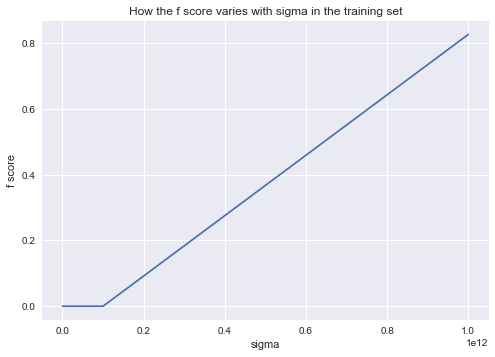

In [226]:
plt.title('How the f score varies with sigma in the training set')
plt.ylabel('f score')
plt.xlabel('sigma')
plt.plot(sig_vals, train_acc_rbf_list)

Now I scan this range with the 5-fold cross validation.

Please note the following cross-validation takes about half an hour to run.

In [227]:
X2_fold_val_std, Y2_fold_val_SVM, X2_fold_train_std, Y2_fold_train_SVM = T_fold_split(X2_train_std, Y2_train_SVM)

In [231]:
sigma_values = np.linspace(0.2 * 10** 12, 0.3 * 10** 12, 100)
acc_list_SVM_CV = []

for sigma in sigma_values:
    acc_CV = 0
    for fold in range(5):
        W_rbf1 = sgd_rbf(X2_fold_train_std[fold], Y2_fold_train_SVM[fold], max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, 
                         regul_strength=1e6, print_outcome=False, sigma = sigma)
        acc_SVM_CV_fold = kernel_score(W_rbf1, X2_fold_val_std[fold], Y2_fold_val_SVM[fold], sigma = sigma)
        acc_CV += acc_SVM_CV_fold/5
    
    acc_list_SVM_CV.append(acc_CV)

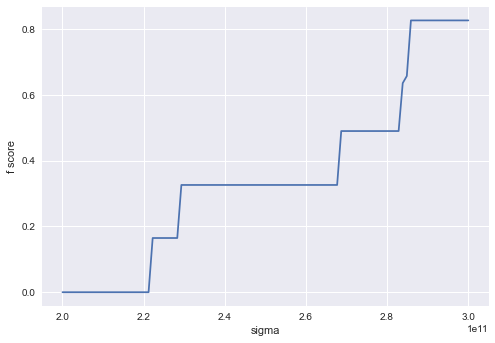

In [232]:
plt.xlabel('sigma')
plt.ylabel('f score')
plt.plot(sigma_values, acc_list_SVM_CV)


Now we can look at the unique values in the accuracy list whcih is measured using f score.

In [235]:
set(acc_list_SVM_CV)

{0.0,
 0.16470588235294117,
 0.3258999122036874,
 0.4897375505800712,
 0.6353686185412362,
 0.6570102778527984,
 0.8259633464448563}

From the plot, above the highest f1 score is about 0.8 which corresponds to the all ones prediction and hence that cannot corresponds to the optimal sigma. Therefore, the optimal sigma is chosen to be the one corresponding to the second largest f score.

In [243]:
sig_index = acc_list_SVM_CV.index(0.6570102778527984)
optimal_sig  = sigma_values[sig_index]
print('The optimal sigma is',optimal_sig, '.')

The optimal sigma is 284848484848.48486 .


# 2.3.2 ROC curve

In [199]:
def tpr(y_preds, y_true):
    num_tp = 0

    for i in range(len(y_preds)):
        if y_preds[i] == 1.0 and y_true[i] == 1.0:
            num_tp += 1
    tpr = num_tp/len(y_preds)
    
    return tpr

In [200]:
def fpr(y_preds, y_true):
    num_fp = 0
    for i in range(len(y_preds)):
        if y_preds[i] == 1.0 and y_true[i] == -1.0:
            num_fp += 1
    fpr = num_fp/len(y_preds)
    
    return fpr

In [210]:
tpr_list = []
fpr_list = []
sig_vals_ROC = np.linspace(0.2 * 10** 12, 0.3 * 10** 12, 100)
# Scanning through the sigma values and calculate the corresponding true positive rate and false positive rate
for sig in sig_vals_ROC:
    
    W_rbf = sgd_rbf(X2_train_std, Y2_train_SVM, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, 
            regul_strength=1e6, print_outcome=False, sigma = sig)
    pred_kernel = kernel_pred(W_rbf, X2_test_std, Y2_test_SVM, sigma = sig)
    
    # calculating the tpr and fpr
    tp_rate = tpr(pred_kernel, Y2_test_SVM)
    fp_rate = fpr(pred_kernel, Y2_test_SVM)
    # adding to the list of tpr and fpr
    tpr_list.append(tp_rate)
    fpr_list.append(fp_rate)

    

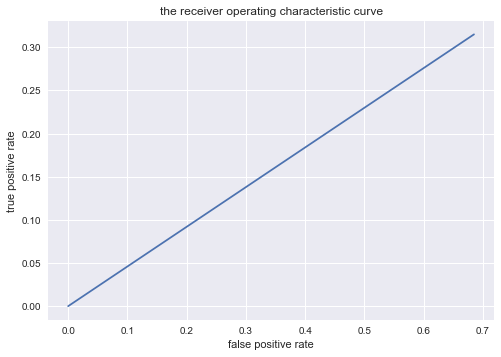

In [211]:
plt.title('the receiver operating characteristic curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(tpr_list, fpr_list)

Here I tried to run the model with the test data using the optimal sigma value, however it is predicting all ones again, which was not expected.

In [245]:
W_rbf_test = sgd_rbf(X2_train_std, Y2_train_SVM, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, 
            regul_strength=1e6, print_outcome=False, sigma = sig)
test_score = kernel_score(W_rbf1, X2_test_std, Y2_test_SVM, sigma = sigma)
test_score

0.8130563798219584

Unfortunately, as seen from the plot above, the desired 'inflated' curve is not present and have a gradient less than one. Therefore, the quality of the kernel SVM is in fact worse than random sampling. The reason for that was not found. It is believed to be due to some errors in the code. Moreover, a sigma in the order of magnitude of $ 10^{12} $ is not reasonable.

# Reference:
[1] James, G., Witten, D., Hastie, T. and Tibshirani, R., 2017. An introduction to statistical learning. New York, N.Y: Springer.